In [1]:
from polys import *

with open("netlib/icosahedron.netlib") as dat:
    icosa = read_netlib(dat)
with open("../polyhedra/netlib_polyhedra/p3.txt") as dat:
    dodeca = read_netlib(dat)
with open("../polyhedra/netlib_polyhedra/p0.txt") as dat:
    tetra = read_netlib(dat)
netlib = []
for i in range(142):
    with open(f"../polyhedra/netlib_polyhedra/p{i}.txt") as dat:
        netlib.append(read_netlib(dat))

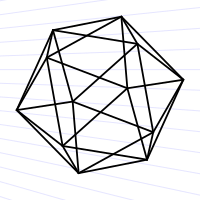

In [2]:
wire_frame(icosa, debug_origin=True)

In [3]:
if 0:
    for i in range(142):
        with open(f"../polyhedra/netlib_polyhedra/p{i}.txt") as dat:
            poly = read_netlib(dat)
            print(f"{i}: {poly.name}")
            wire_frame(sit_polyhedron(poly), width=100, height=100, debug_origin=True)

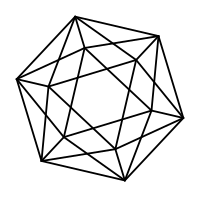

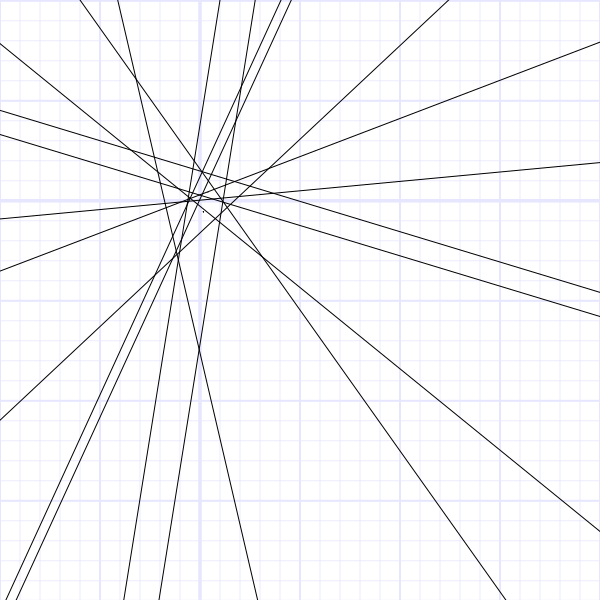

In [4]:
sitting = sit_polyhedron(icosa)
wire_frame(sitting)
lines = [p.xy_points() for p in sitting.planes()]
drawing = Drawing(600, 600)
drawing.translate(200, 200.78)
drawing.scale(20, 20)
drawing.grid()
drawing.set_line_width(0.05)
for line in lines:
    draw_line(drawing, line)
    drawing.stroke()
if 0:
    with drawing.style(rgb=(1,0,0)):
        draw_cross(drawing, 0, 0, 1)
drawing.display()

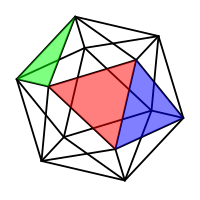

In [10]:
def wire_frame(poly, **drawing_kwargs):
    drawing_kwargs.setdefault('width', 200)
    drawing_kwargs.setdefault('height', 200)
    b3 = poly.bounds()
    margin = (b3.ux - b3.lx) * 0.1
    bounds = (b3.lx - margin, b3.ly - margin, b3.ux + margin, b3.uy + margin)
    drawing = Drawing(bounds=bounds, **drawing_kwargs)
    drawing.set_line_width(0.02)
    for seg in poly.edges():
        drawing.move_to(seg.p1.x, seg.p1.y)
        drawing.line_to(seg.p2.x, seg.p2.y)
        drawing.stroke()
    for iface, style in enumerate([dict(rgba=(1,0,0,.5)), dict(rgba=(0,1,0,.5)), dict(rgba=(0,0,1,.5))]):
        with drawing.style(**style):
            for i, pt in enumerate(poly.faces[iface]):
                if i == 0:
                    drawing.move_to(pt.x, pt.y)
                else:
                    drawing.line_to(pt.x, pt.y)
            drawing.close_path()
            drawing.fill()
    IPython.display.display(drawing.display())
wire_frame(sitting)

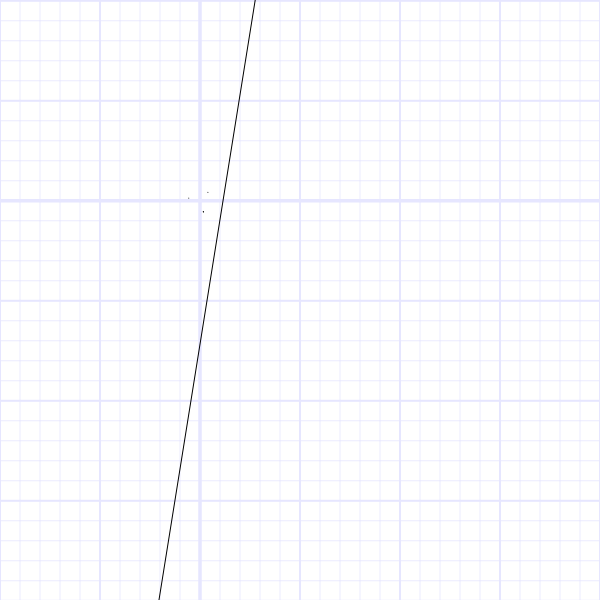

In [16]:
lines = [p.xy_points() for p in sitting.planes()[:6]]
drawing = Drawing(600, 600)
drawing.translate(200, 200.78)
drawing.scale(20, 20)
drawing.grid()
drawing.set_line_width(0.05)
for line in lines:
    draw_line(drawing, line)
    drawing.stroke()
if 0:
    with drawing.style(rgb=(1,0,0)):
        draw_cross(drawing, 0, 0, 1)
drawing.display()